In [22]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import glob


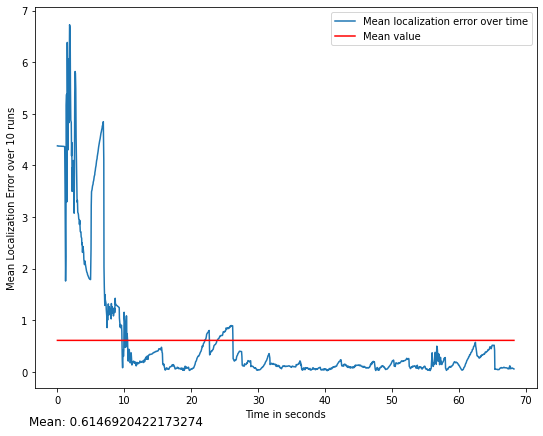

In [23]:
files = glob.glob('Position_errors_roulette/*.csv')
all_errors = []

for file in files:
    df = pd.read_csv(file, names=['position_error', 'time'], header=0)
    position_error = df['position_error'].to_numpy()
    # only taking the first 1362 values
    # since some measurements are +/- 1 shorter/longer
    position_error = position_error[:1362]
    time = df['time'].to_numpy()
    time_norm = time - time[0]
    time_norm = time_norm[:1362]
    all_errors.append(position_error)

mean_localization_error = np.mean(all_errors, axis=0)
mean = np.mean(mean_localization_error)

fig = plt.figure(figsize=(9,7))
#plt.yscale('log')
plt.plot(time_norm, mean_localization_error)
plt.plot(time_norm, np.full_like(mean_localization_error,mean), color='red')
plt.ylabel('Mean Localization Error over 10 runs')
plt.xlabel('Time in seconds')
plt.legend(['Mean localization error over time', 'Mean value'])
fig.text(.25, .05, f'Mean: {mean}', ha='center', fontsize='large')

plt.savefig('localization_error.jpg')
